# Gaia测光 GP-RP
** 无测光误差 **

# 数据的引入和format (Alternative)

In [37]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import datetime
from scipy.optimize import curve_fit
%matplotlib inline

data_dir = '/Users/SY/Desktop/obic/data/'
#data_dir = '/Users/dengdingshan/Documents/data/obic/'

In [38]:
#read as pandas
starcatalog_fram = pd.read_csv(data_dir + 'LMOB-V4-SFDGP-final.csv') 

###########

#starcatlog_fram = starcatlog_fram.ix[:,:517]
#print(starcatalog_fram)

In [39]:
### Elective CHOICE

########### I.
#change logTeff into Teff.

# def tenn(x):
#     y=10 ** x
#     return y

# Teff_tbl = starcatalog['logTeff'].apply(tenn)
###########

########### II.
#add [Teff] into DATAFRAME

#data_fram = starcatalog_fram[['TEFF_1','ERR_TEFF_1','Jmag_1','e_Jmag_1','Hmag_1','e_Hmag_1']]
#print(data_fram)
###########

########### III.
# fill the NaN blocks with 0

starcatalog_fram_fil0 = starcatalog_fram.fillna(0)

#print(starcatalog_fram_fil['LOGG'])
############


In [40]:
starcatalog_fram.columns

Index(['Unnamed: 0', 'TEFF', 'ERR_TEFF', 'RA', 'DEC', 'LOGG', 'ERR_LOGG',
       'FEH', 'ERR_FEH', 'SFD_ebv', 'l', 'b', 'J', 'ERR_J', 'H', 'ERR_H', 'KS',
       'ERR_KS', 'W1', 'ERR_W1', 'W2', 'ERR_W2', 'GMAG', 'GBP', 'GRP'],
      dtype='object')

## 参数的选取（Input）

In [68]:
### variables

teff = 'TEFF'

color1 = 'GBP'
color2 = 'GMAG'
err_teff = 'ERR_TEFF'

err_c1 = 'ERR_' + color1
#'e_' + color1
#color1 + 'err' 
#color1 + 'err'
#ERR_' + color1
#'e_' + color1

err_c2 ='ERR_' + color2
#'ERR_' + color2
#'e_' + color2

## Logg，误差的选取(Input:)

In [69]:
### we just need the mainsquence (dwarf stars)

# #judge logg >3.0

Judge_logg = 3.5

starcatalog_fram_fil = starcatalog_fram_fil0[(starcatalog_fram_fil0['LOGG']> Judge_logg)]

In [70]:
starcatalog_fram_fil

,Unnamed: 0,TEFF,ERR_TEFF,RA,DEC,LOGG,ERR_LOGG,FEH,ERR_FEH,SFD_ebv,...,ERR_H,KS,ERR_KS,W1,ERR_W1,W2,ERR_W2,GMAG,GBP,GRP
0,0,10777.271,529.91864,10.982511,29.229935,3.810128,0.213456,0.229146,0.537241,0.046169,...,0.029,13.585,0.040,13.555,0.025,13.607,0.032,13.496696,13.473557,13.502337
1,1,9736.669,540.93280,3.909730,29.745453,3.778836,0.209148,-0.269502,0.377028,0.041820,...,0.030,13.145,0.032,13.089,0.024,13.062,0.027,13.007643,12.967636,13.021194
2,2,12887.973,623.53820,11.122973,32.474289,3.781759,0.225749,0.201574,0.548363,0.076748,...,0.027,13.307,0.031,13.334,0.025,13.338,0.029,13.245914,13.209960,13.243776
3,3,10655.061,529.05536,5.356646,32.779716,3.753979,0.213669,0.208049,0.537557,0.056845,...,0.022,11.459,0.020,11.471,0.023,11.497,0.021,11.513627,11.500922,11.492808
4,4,11619.821,525.54895,1.904742,33.266872,3.678267,0.214518,0.120070,0.539089,0.049283,...,0.030,10.736,0.018,10.742,0.024,10.778,0.021,10.644796,10.626604,10.672137
5,5,10661.613,528.92440,7.344084,38.459476,3.753979,0.213702,0.204829,0.537607,0.061653,...,0.024,12.604,0.028,12.572,0.023,12.571,0.024,12.575973,12.556415,12.563779
6,6,15661.499,563.47296,5.740505,39.651047,3.911025,0.210222,0.876936,0.419756,0.084510,...,0.019,12.230,0.022,12.263,0.023,12.305,0.023,11.879280,11.784900,11.964633
7,7,13243.816,545.94380,2.634670,40.198498,3.744895,0.211897,0.419277,0.480521,0.076250,...,0.015,9.338,0.016,9.303,0.023,9.266,0.020,9.387974,9.395766,9.384436
8,8,11621.644,528.79220,1.845365,42.630825,3.781759,0.213734,0.201574,0.537658,0.078790,...,0.021,10.949,0.020,10.968,0.022,11.001,0.020,10.967322,10.966701,10.967062
9,9,9811.874,574.27356,3.156993,43.260487,3.845936,0.255732,-0.286863,0.397692,0.074736,...,0.026,13.418,0.030,13.400,0.025,13.409,0.031,13.526985,13.515461,13.484823


## 有效温度 Teff 的限制（Input:）

In [71]:
#filt the good one
#apogee_tbl_fil = apogee_tbl[np.argwhere(np.logical_and(apogee_tbl['teff'] > 0, apogee_tbl['logg'] > -3))]
#apogee_tbl_fil = apogee_tbl_fil[np.argwhere(np.logical_and(apogee_tbl_fil['j'].flatten() > -1, \
#                                                           apogee_tbl_fil['h'].flatten() > -1))]
#USE goodOB 


starcatalog_fram_fil=starcatalog_fram_fil[(((starcatalog_fram_fil[err_teff] != 0 ))\
                                          #& (starcatalog_fram_fil[teff]>= 10000))\
                                          #& (starcatalog_fram_fil[teff]<= 16000))\
                                          & (((starcatalog_fram_fil[err_teff]< 630)\
                                          &(starcatalog_fram_fil[teff]> 9000))\
                                          |((starcatalog_fram_fil[err_teff]< 500)\
                                          & (starcatalog_fram_fil[teff]<= 9000))))]
print(np.max(starcatalog_fram_fil[teff]))
print(starcatalog_fram_fil.iloc[:,0].size)

24950.844
21866


## 蓝色边缘的比例，bin最小值的选取（Input：）

In [72]:
# Determine the input numbers.

# Bin width, usually 50 (for more scatter, try 1000 or other figures)
#bin_width = 1000

# Ratio of the bluest edge, usually 5%
rat = 5

# Low end criteria. If the number in a bin is lower than this number then neglect.  
low_crit = 50

In [74]:
# Find the start point and bin number of Teff. 
# Start point: the first number divisible by bin_width smaller than min(teff)
# Bin number: Start from start point and cover all the teff range.


#teff_start = min(apogee_tbl_fil['teff']) - min(apogee_tbl_fil['teff']) % (bin_width/2)
#bin_number = math.ceil((max(apogee_tbl_fil['teff']) - teff_start) / bin_width)

#teff_start = min(starcatalog_fram_fil[teff])-min(starcatalog_fram_fil[teff])%(bin_width / 2)

teff_start= np.min(starcatalog_fram_fil[teff])
slide_index = 500 #the pace of slide
#bin_number = math.ceil((max(starcatalog_fram_fil[teff])-teff_start) / bin_width)


# 内禀色指数的计算（蓝色边缘方法），同时取出某一部分用于SFD判断

## DEF

In [75]:
def data(teff_start,ratio,low_crit,ratio_SFD,slide_index):
    
    start_time = time.time()
    int_teff = []
    int_color = []
    bin_int_color = []
    
    SFD_RA = []; SFD_DEC = []; SFD_TEFF = []; SFD_color1 = []; SFD_color2 = [];SFD_ebv = []
    
    data_final = pd.DataFrame(columns=[teff,color1,color2])
    teff_judge = teff_start
    while teff_judge < np.max(starcatalog_fram_fil[teff]) - 500:
        #print(teff_judge)
        if teff_judge <16000:
            bin_width = 500
        else:
            bin_width = 1000

        bin_tbl =starcatalog_fram_fil[np.logical_and(starcatalog_fram_fil[teff] > teff_judge, \
                                                starcatalog_fram_fil[teff] < teff_judge+bin_width)]

        #print(teff_judge)
       
        
        if len(bin_tbl) < low_crit:
            teff_judge = teff_judge+slide_index
            #print('1')
            continue
            
        source_num = 0
        #print(len(bin_tbl))

        while source_num != len(bin_tbl):
            source_num = len(bin_tbl)

        data_final = data_final.append(bin_tbl[[teff,color1,color2]])
        #print(len(bin_tbl))

        int_teff.append(float(teff_judge+bin_width/2))
        bin_tbl['color'] = bin_tbl[color1]-bin_tbl[color2]
        bin_sort = bin_tbl.sort_index(axis = 0,ascending = True,by = 'color')
        
        # 每个bin中前ratio_SFD的部分用于取得ebv
        color_SFD = bin_sort['color'].values[:math.ceil(len(bin_tbl)*ratio_SFD/100)]
        bin_tbl_SFD = bin_sort[(bin_sort['color']<=np.max(color_SFD))]
        
        for ppp in range(len(bin_tbl_SFD)):
            SFD_RA.append(bin_tbl_SFD['RA'].values[ppp])
            SFD_DEC.append(bin_tbl_SFD['DEC'].values[ppp])
            SFD_TEFF.append(bin_tbl_SFD['TEFF'].values[ppp])
            SFD_color1.append(bin_tbl_SFD[color1].values[ppp])
            SFD_color2.append(bin_tbl_SFD[color2].values[ppp])
            SFD_ebv.append(bin_tbl_SFD['SFD_ebv'].values[ppp])
        
        # 每个bin中前ratio(usually 5%)的部分 用于取得内禀色指数int_color
        color5 = bin_sort['color'].values[:math.ceil(len(bin_tbl)*ratio/100)]
        bin_tbl_5 = bin_sort[(bin_sort['color']<=np.max(color5))]
        
        
        if len(color5) != 0:
            for i in range(10):
                bin_mean = np.median(color5)
                bin_sigma = np.std(color5)
                bin_int_color = color5\
                [((color5<= bin_mean+3*bin_sigma)\
                & (color5>= bin_mean-3*bin_sigma))]
                print(bin_mean,bin_sigma)
                color5 = np.array(bin_int_color)

            int_color.append(np.median(bin_int_color))
            
        teff_judge = teff_judge+slide_index
        
    SFD_tbl_final = pd.DataFrame({'TEFF':np.array(SFD_TEFF),'RA':np.array(SFD_RA),\
                                  'DEC':np.array(SFD_DEC),color1:np.array(SFD_color1),\
                                 color2:np.array(SFD_color2),'SFD_ebv':np.array(SFD_ebv)})
    
    #print(time.time() - start_time)
    print(int_teff,int_color)
     
#     print(data_final.iloc[:,0].size)
    return int_teff,int_color,data_final,SFD_tbl_final

## 运算，拟合，SFD的准备（Input:)

In [76]:
# SFD ratio

ratio_SFD = 100

# fitting curve
int_teff,int_color,data_final,SFD_tbl_ratio = data(teff_start,rat,low_crit,ratio_SFD,slide_index)

print(type(int_teff))
int_teff_fit = list(np.array(int_teff)/10000)

def func(x, a, b, c):
    return a * np.exp(-b * x) + c
 

popt, pcov = curve_fit(func, int_teff_fit, int_color,bounds=([0,0,-100000], [50,0.03 , -40]))
#popt数组中，三个值分别是待求参数a,b,c
colorvals = [func(i, popt[0],popt[1],popt[2]) for i in int_teff_fit]

#print(colorvals)
#print(pcov)
print(str(popt[0])+'* np.exp('+str(-popt[1])+'*x)'+str(popt[2])) #在屏幕上打印拟合多项式 
# fc = np.polyfit(int_teff, int_color, 1)#用3次多项式拟合
# fitcurve = np.poly1d(fc)
# print(fitcurve) #在屏幕上打印拟合多项式

# colorvals=fitcurve(int_teff)

# print(len(colorvals),len(int_teff))
#print(type(int_teff))
print(int_teff_fit,int_color)
#SFD_tbl_ratio['SFD_ebv']


/Users/SY/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/SY/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


-0.0005445 0.0263198153505
0.001262 0.0214861523726
0.0013315 0.0204691339072
0.0013315 0.0204691339072
0.0013315 0.0204691339072
0.0013315 0.0204691339072
0.0013315 0.0204691339072
0.0013315 0.0204691339072
0.0013315 0.0204691339072
0.0013315 0.0204691339072
-0.020156 0.0332363956944
-0.0193305 0.0212590194512
-0.019156 0.0196696855639
-0.019156 0.0196696855639
-0.019156 0.0196696855639
-0.019156 0.0196696855639
-0.019156 0.0196696855639
-0.019156 0.0196696855639
-0.019156 0.0196696855639
-0.019156 0.0196696855639
-0.020231 0.0424710318603
-0.019558 0.0207905459748
-0.019558 0.0207905459748
-0.019558 0.0207905459748
-0.019558 0.0207905459748
-0.019558 0.0207905459748
-0.019558 0.0207905459748
-0.019558 0.0207905459748
-0.019558 0.0207905459748
-0.019558 0.0207905459748
-0.022376 0.0624450547856
-0.021727 0.0216854451222
-0.021717 0.0199036428245
-0.021717 0.0199036428245
-0.021717 0.0199036428245
-0.021717 0.0199036428245
-0.021717 0.0199036428245
-0.021717 0.0199036428245
-0.021717 0

# SFD的使用：—— 将使用到新的包

1. 选取SFD中Ebv小于某一个值的认为是零消光源（Lamost)——Thins page
2. 用目前的色指数减去 Ebv 给出的消光值，然后去归算内禀色指数 - GOSSS

In [77]:
SFD_catalog_color = []
SFD_catalog_teff = []
lens = len(SFD_tbl_ratio)

for i in range(lens):
    if SFD_tbl_ratio['SFD_ebv'].values[i] < 0.05:
        print(SFD_tbl_ratio['SFD_ebv'].values[i])
        SFD_colorindex = SFD_tbl_ratio[color1].values[i]\
        - (SFD_tbl_ratio[color2].values[i])
        SFD_catalog_color.append(SFD_colorindex)
    
        SFD_catalog_teff.append(SFD_tbl_ratio[teff].values[i])
        print(i)
#     print(i)
SFD_catalog_teff_fit = list(np.array(SFD_catalog_teff)/10000)
# print(time.time() - time_start)

0.041019283
4
0.022704063
6
0.048519637
8
0.041820228
12
0.027191928
13
0.014547495
17
0.030196704
18
0.030453695
19
0.03139028
20
0.042601343
21
0.026452217
26
0.045912426
29
0.029268835
30
0.036684189
37
0.024495177
40
0.048979618
44
0.04094011
54
0.030097082
55
0.040217124
61
0.008425606
91
0.026427526
147
0.024188343
236
0.033569511
467
0.046524294
631
0.024199104
640
0.015053822
670
0.020970015
761
0.040693924
1130
0.007876961
1172
0.008126878
2435
0.014996656
2436
0.017054098
2437
0.037982602
2438
0.033250172
2439
0.02894998
2441
0.015117012
2442
0.016479859
2444
0.043085132
2445
0.017517537
2447
0.046943616
2448
0.016046491
2449
0.023317764
2450
0.038094103
2453
0.019388784
2456
0.041050255
2459
0.022494042
2463
0.03419904
2464
0.033464283
2465
0.047392219
2466
0.03764176
2468
0.044281721
2472
0.017819846
2478
0.027840354
2482
0.011033139
2484
0.047303483
2488
0.047939591
2493
0.048194937
2500
0.035149813
2516
0.037490856
2517
0.044614132
2520
0.034845535
2528
0.034194447
2944
0

# 图片输出

## 图片保存格式（Input:)

In [78]:
### figures & Savename
cc1 = 'GBP'
cc2 = 'G'

save = data_dir + 'pictures/'
# save = '/Users/SY/Desktop/obic/picture/'

i = datetime.datetime.now()
date_now = "%s_%s_%s_" % (i.year, i.month, i.day) 
ylabel = '$%s - %s$'%(cc1,cc2) 
savename1 = save + date_now + cc1 + cc2 + 'LMOB'+'FEH'+'>'+'0'+'.png'
savename2 = save + date_now + cc1 + cc2 + 'LMOB'+'FEH'+'_all'+'.png'
savename3 = save + date_now + 'errteff.png'



In [79]:
# plt hist of ebv

# plt.hist(ebv_final,1000)
# plt.savefig(save+'ebv.png',dpi = 200)
# plt.xlim(0,2)
# plt.show()

# 拟合SFD
 

popt_sfd, pcov_sfd = curve_fit(func, SFD_catalog_teff_fit, SFD_catalog_color,bounds=([0,0,-100000], [50,0.03 , -40]))
#popt数组中，三个值分别是待求参数a,b,c
SFD_vals = [func(i, popt_sfd[0],popt_sfd[1],popt_sfd[2]) for i in SFD_catalog_teff_fit]

print(SFD_catalog_teff_fit, SFD_catalog_color)
#print(SFD_vals)
print(str(popt_sfd[0])+'* np.exp('+str(-popt_sfd[1])+'*x)'+str(popt_sfd[2])) #在屏幕上打印拟合多项式

# fc = np.polyfit(SFD_catalog_teff, SFD_catalog_color, 1)#用3次多项式拟合
# fitcurve = np.poly1d(fc)
# print(fitcurve) #在屏幕上打印拟合多项式
# SFD_vals=fitcurve(SFD_catalog_teff)


[0.99692219999999998, 0.98752019999999996, 0.98339410000000005, 0.9736669, 0.95220020000000005, 0.97935480000000008, 0.99689539999999999, 0.95278420000000008, 0.99391569999999996, 0.95793470000000003, 0.97269079999999997, 0.98416150000000002, 0.9527002, 0.98355429999999999, 0.96956389999999992, 0.95521420000000001, 0.96524249999999989, 0.99004740000000002, 0.98732039999999999, 0.98250599999999999, 0.97542870000000004, 0.95539479999999999, 0.9642156999999999, 0.98549680000000006, 0.99912980000000007, 0.9641168, 0.99918770000000001, 0.96880820000000001, 0.98746569999999989, 1.0388131999999999, 1.0166226, 1.0081076999999998, 1.0298555, 1.0397563000000001, 1.0122856, 1.0338398, 1.0207344999999999, 1.0463564000000001, 1.0367900999999999, 1.0437514999999999, 1.0465103999999998, 1.0138796999999999, 1.0343722, 1.0049622999999999, 1.0492444999999999, 1.0356182, 1.0387261000000001, 1.0491236000000002, 1.0366438, 1.0230424999999999, 1.0194056, 1.0142879999999999, 1.0146660000000001, 1.03035300000

## 绘图所需的具体量（Alternative)

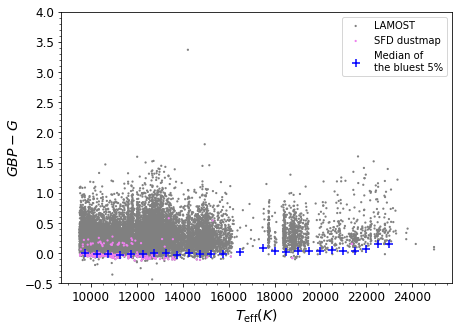

In [80]:
#PLT
ax = plt.figure(1,figsize=(7, 5))  
plt.xlabel('$T_\mathrm{eff}(K)$',fontsize=14)
plt.ylabel(ylabel,fontsize=14)

# the data we use
plt.scatter(starcatalog_fram_fil[teff], starcatalog_fram_fil[color1]-starcatalog_fram_fil[color2],\
            c='grey',s=5, edgecolors='None',label='LAMOST')

# data we use in the SFD dustmap
plt.scatter(SFD_catalog_teff,SFD_catalog_color,alpha=1,edgecolors='None',c='violet',s=5,label='SFD dustmap',zorder=2)

# SFD fitcurve
#plt.plot(SFD_catalog_teff, SFD_vals, c='black',linewidth = 3.5,label='fitting curve of \nthe E(B-V)<0.05',zorder=1)

# ic plot from blue edge
#plt.plot(int_teff, colorvals, c='r',linewidth = 3.5,label='fitting curve of \nthe bluest 5%',zorder=1,alpha=1)

# ic from blue edge

plt.scatter(int_teff, int_color, edgecolors='None',c='b', marker = '+',s=50,label='Median of\nthe bluest 5%',zorder=2)

# ic from Allen's work 
# plt.scatter(BBFrame_fil['Teff'],BBFrame_fil['J-H'],c='lime',s=11,label='Allen',zorder=2)

#ic from parsec
#plt.scatter(parsec_teff,parsec_color,c='gold',s=5,label='PARSEC',zorder=2)
#plt.plot(parsec_teff, parsec_color, c='gold',linewidth = 3.5,label='PARSEC',zorder=1,alpha=1)
### Draw the plot

# plt.xlabel('$T_\mathrm{eff}$'); plt.ylabel(ylabel)
#plt.scatter(BBFrame_fil['Teff'],BBFrame_fil['J-H'],c='lightgreen',s=15,label='Allen')

plt.legend(loc='upper right')
#new_ticks = np.linspace(-1,2,7)
#plt.yticks(new_ticks)

# plt.ylim(np.min(starcatalog_fram_fil[color1] - starcatalog_fram_fil[color2]) - 0.5,\
#         np.max(starcatalog_fram_fil[color1] - starcatalog_fram_fil[color2]))
#plt.ylim(np.min(starcatalog_fram_fil[color1] - starcatalog_fram_fil[color2]) - 0.5,\
#       4)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig(savename1,dpi=200)
plt.minorticks_on()
plt.ylim(-0.5,4)
#plt.yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6])
#plt.xlim(9000,25000)
plt.savefig(savename2,dpi=200)

plt.show()